# Importing the necessary modules


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
sns.set_style('whitegrid')


# Reading the file and statistical analysis


In [2]:
df = pd.read_csv('data/games.csv')

In [3]:
df.head(5)

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gameId,253.0,2.018108e+09,11449.014222,2.018091e+09,2.018101e+09,2.018110e+09,2.018121e+09,2.018123e+09
week,253.0,9.122530e+00,4.979801,1.000000e+00,5.000000e+00,9.000000e+00,1.400000e+01,1.700000e+01


In [6]:
df.shape  #viewing the shape of the dataframe 

(253, 6)

Let's convert the date and time columns to pandas datetime values so that we can use readymade functions and do things more effectively in our analysis

In [7]:
#converting the date values to pandas date values
df['gameDate'] = pd.to_datetime(df['gameDate']).dt.date

#converting the time values to pandas time values
df['gameTimeEastern'] = pd.to_datetime(df['gameTimeEastern']).dt.time


In [8]:
df.head(5)

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


# Exploratory Data Analysis


In [9]:
#Finding out the number of games played per date
date_dist = df['gameDate'].value_counts().reset_index()
date_dist

,index,gameDate
0,2018-12-30,16
1,2018-12-02,14
2,2018-09-16,14
3,2018-09-23,14
4,2018-12-09,14
5,2018-10-14,13
6,2018-10-07,13
7,2018-12-23,13
8,2018-09-30,13
9,2018-12-16,12


In [10]:
#Renaming the columns
date_dist.columns = ['date', 'frequency']
date_dist.columns

Index(['date', 'frequency'], dtype='object')

In [11]:
#sorting the dataframe based on date values
sorted_date = date_dist.sort_values('date').set_index('date')

In [12]:
sorted_date.head()

,frequency
date,
2018-09-06,1
2018-09-09,10
2018-09-10,2
2018-09-13,1
2018-09-16,14


Text(0, 0.5, 'frequency')

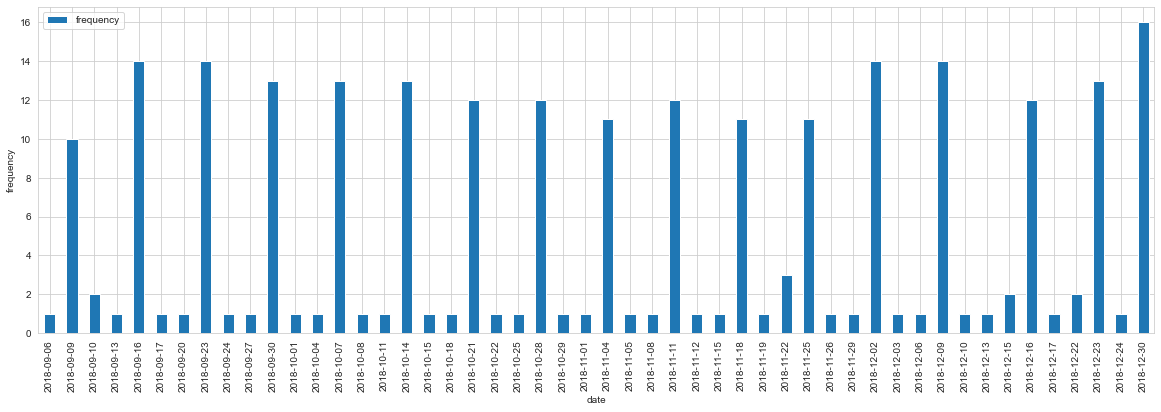

In [13]:
#Plotting a bar plot for frequency of games per date
sorted_date.plot(kind='bar', figsize=(20,6))
plt.ylabel('frequency')

We can do similar kind of analysis for date, time and week as well.

In [14]:
df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


In [15]:
#Let's do the analysis for time
time_dist = df['gameTimeEastern'].value_counts().reset_index()


In [16]:
time_dist

,index,gameTimeEastern
0,13:00:00,136
1,16:25:00,38
2,20:20:00,34
3,16:05:00,22
4,20:15:00,15
5,16:30:00,3
6,09:30:00,2
7,12:30:00,1
8,22:20:00,1
9,19:10:00,1


In [17]:
time_dist.columns = ['time', 'frequency']

In [18]:
time_dist.columns

Index(['time', 'frequency'], dtype='object')

In [19]:
time_dist

,time,frequency
0,13:00:00,136
1,16:25:00,38
2,20:20:00,34
3,16:05:00,22
4,20:15:00,15
5,16:30:00,3
6,09:30:00,2
7,12:30:00,1
8,22:20:00,1
9,19:10:00,1


In [20]:
sorted_time = time_dist.sort_values('time').set_index('time')

In [21]:
sorted_time.head()

,frequency
time,
09:30:00,2
12:30:00,1
13:00:00,136
16:05:00,22
16:25:00,38


<AxesSubplot:xlabel='time'>

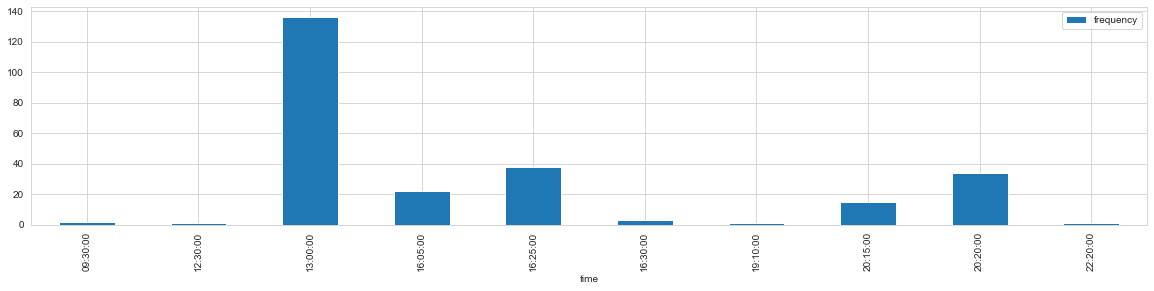

In [22]:
sorted_time.plot(kind = 'bar', figsize=(20,4))

In [23]:
# Writing a function to get the plots for the frequency of games per any criteria like-date, time etc.

def find_dist(df, col_name):
    #Frequency of games per column value
    dist = df[col_name].value_counts().reset_index()
    
    #Renaming the columns
    dist.columns = [col_name, 'frequency']
    
    #sorting the dataframe based on column values
    sorted_dist = dist.sort_values(col_name).set_index(col_name)
    
    #plotting the frequency distribution
    
    sorted_dist.plot(kind = 'bar', figsize=(20,6))
    plt.ylabel('frequency')
    
    #Return to complete and execute the function
    
    return 


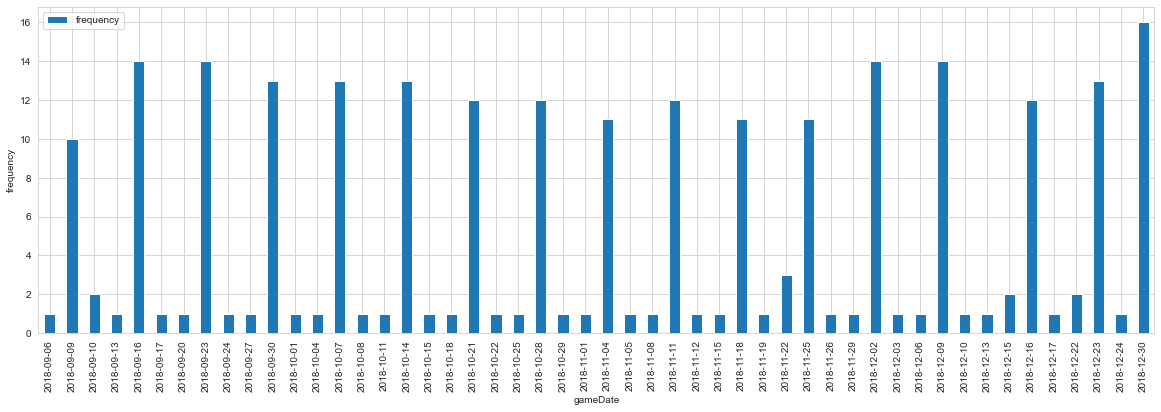

In [24]:
find_dist(df, 'gameDate') #plot showing the frequency of games in relation with date

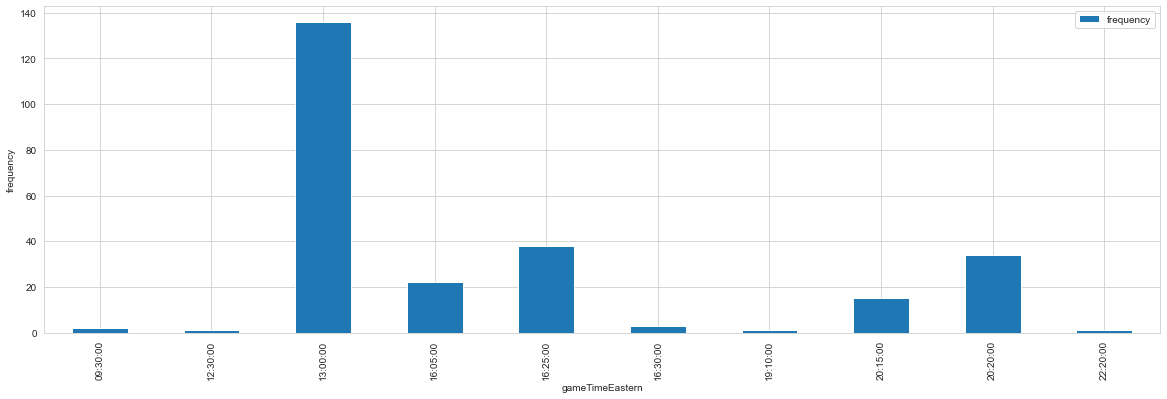

In [25]:
find_dist(df, 'gameTimeEastern')  #plot showing the frequency of games played in relation with time.

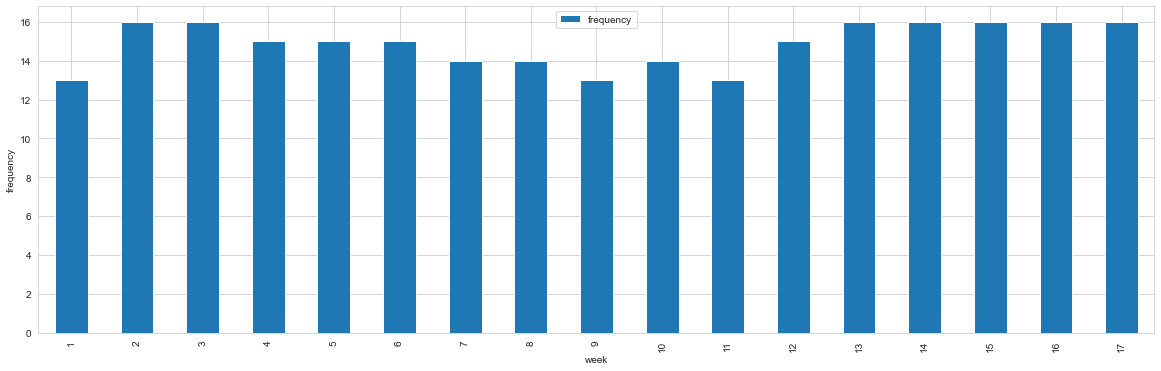

In [26]:
find_dist(df, 'week')   #plot showing the frequency of games played in relation with week.

Now, let us look at how the frequency of games are distributed on the basis of days. For this we need to convert the dates into days first.

In [27]:
#creating a new column containing the day of the game information extracted from the date.
df['gameDay'] = df['gameDate'].apply(lambda x: x.strftime('%A'))

df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameDay
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1,Thursday
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1,Sunday
2,2018090902,2018-09-09,13:00:00,IND,CIN,1,Sunday
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1,Sunday
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1,Sunday


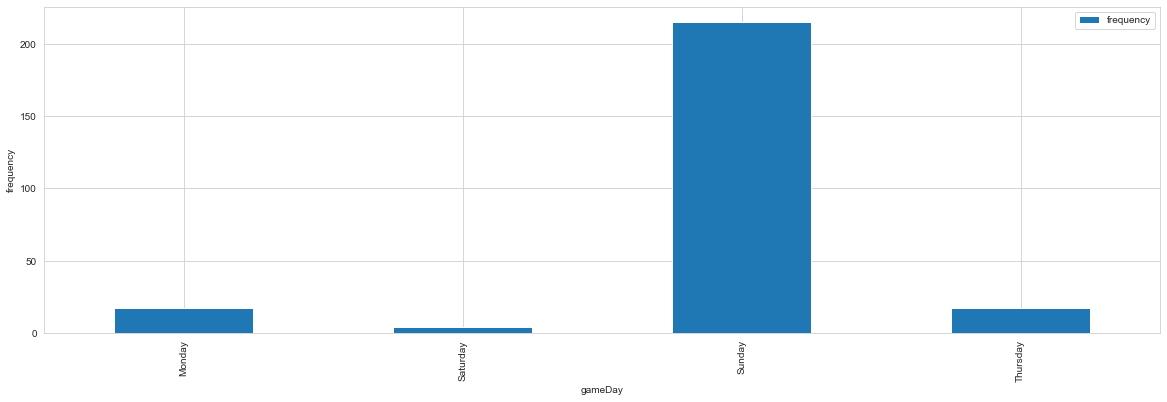

In [28]:
find_dist(df, 'gameDay') #plot showing the frequency of games played in relation with days.

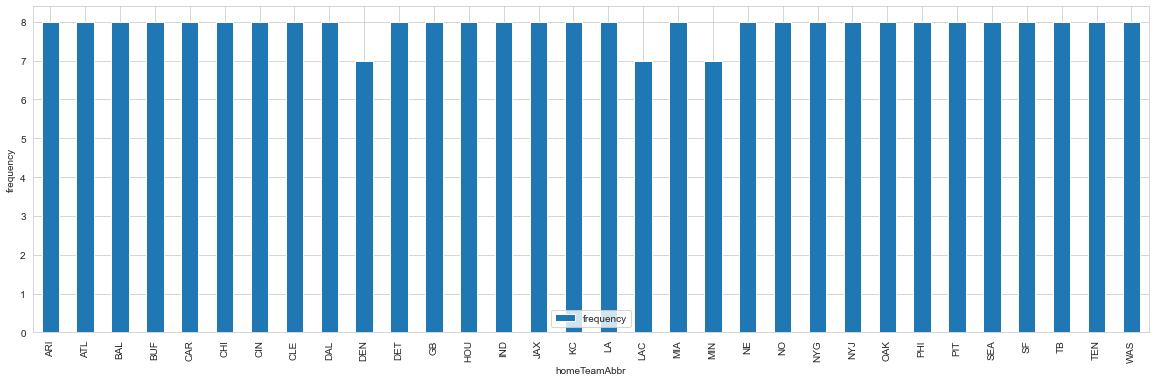

In [29]:
find_dist(df, 'homeTeamAbbr') #plot showing the frequency of games played by the home team

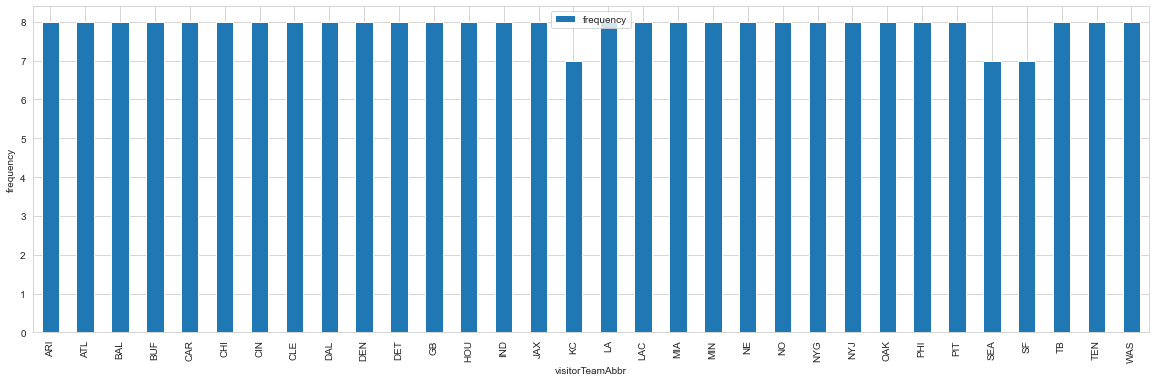

In [30]:
find_dist(df, 'visitorTeamAbbr') #plot showing the frequency of games played by the away team

# Player Data


Now, we will be analysing the NFL player data and try to generate insights and find useful trends through our analysis

In [31]:
df2 = pd.read_csv('data/players.csv') #reading the player dataset

In [32]:
df2.head() 

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [34]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nflId,1303.0,2.416518e+06,533333.499159,252.0,2539662.5,2553658.0,2558183.5,2561671.0
weight,1303.0,2.225372e+02,29.476747,159.0,200.0,216.0,242.0,352.0


In [35]:
df2.shape #means we have 1303 players and 7 features in our dataset

(1303, 7)

In [36]:
#converting the date columns to pandas datetime
df2['birthDate'] = pd.to_datetime(df2['birthDate']).dt.date


#Extracting the year from the birthdate
df2['birthYear'] = pd.to_datetime(df2['birthDate']).dt.year

In [37]:
df2.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993


Let's find out the age distribution of the NFL players with respect to the year 2018 since the dataset is for the year 2018

In [38]:
df2['age'] = 2018 - df2['birthYear']

In [39]:
df2.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


In [40]:
# Writing a function to get the plots for the frequency of palyers per any criteria like-date, time etc.

def find_dist(df, col_name):
    #Frequency of players per column value
    dist = df[col_name].value_counts().reset_index()
    
    #Renaming the columns
    dist.columns = [col_name, 'frequency']
    
    #sorting the dataframe based on column values
    sorted_dist = dist.sort_values(col_name).set_index(col_name)
    
    #plotting the frequency distribution
    
    sorted_dist.plot(kind = 'bar', figsize=(20,6), cmap = 'viridis')
    plt.ylabel('frequency')
    
    #Return to complete and execute the function
    
    return 


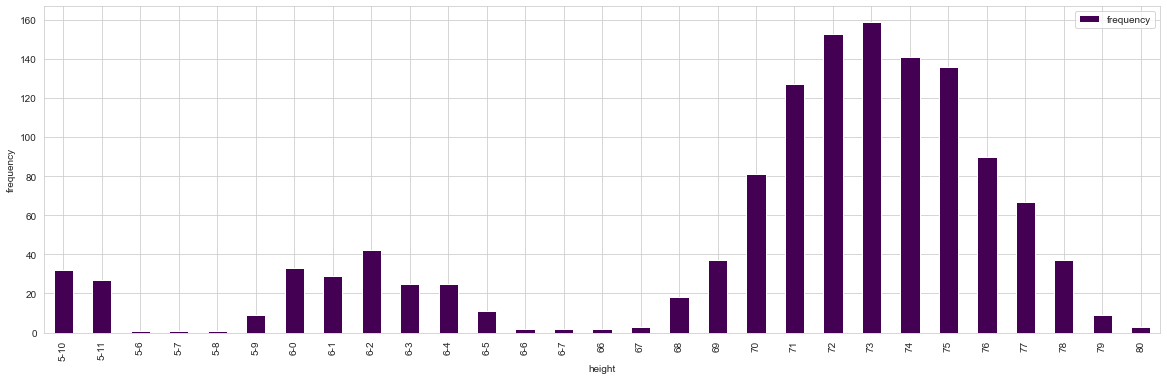

In [41]:
find_dist(df2, 'height') #plot showing the number of players with relation to height

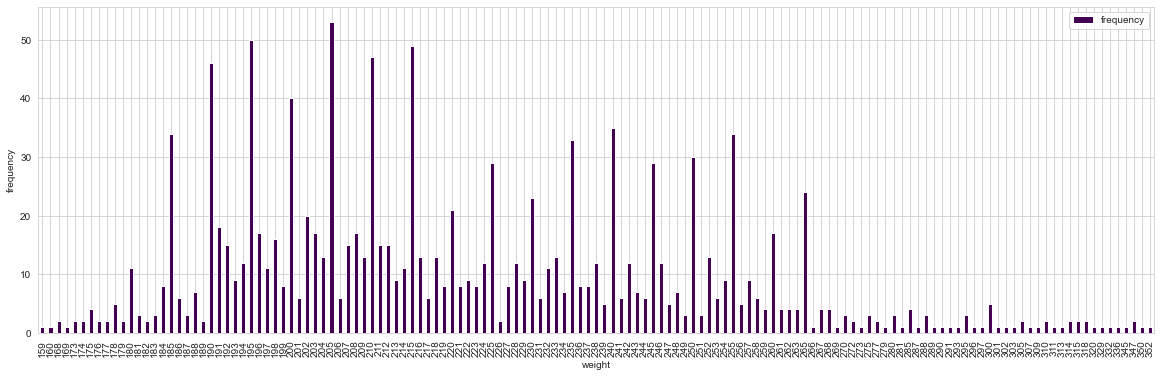

In [42]:
find_dist(df2, 'weight') #plot showing the number of players with relation to weight

Text(0, 0.5, 'frequency')

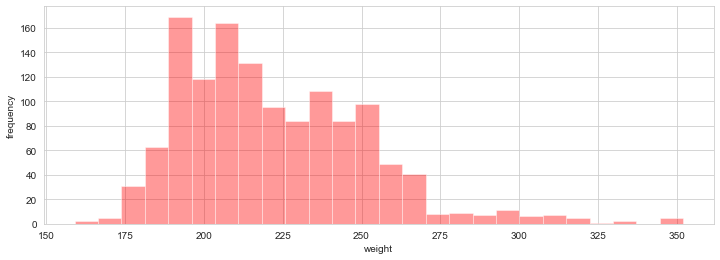

In [74]:
##plot showing the distribution of number of players with relation to weight
plt.figure(figsize=(12,4))
sns.distplot(df2['weight'], kde= False, color = 'red' )
plt.ylabel('frequency')

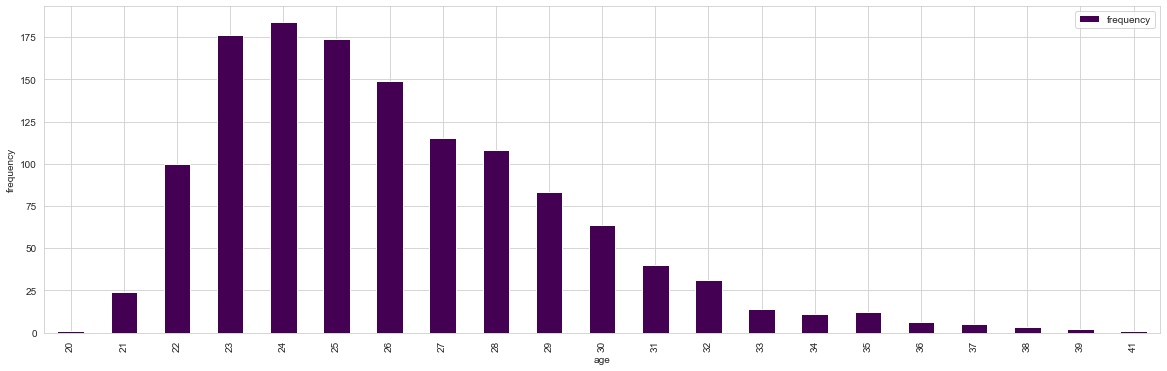

In [43]:
find_dist(df2, 'age') #plot showing the number of players with relation to age

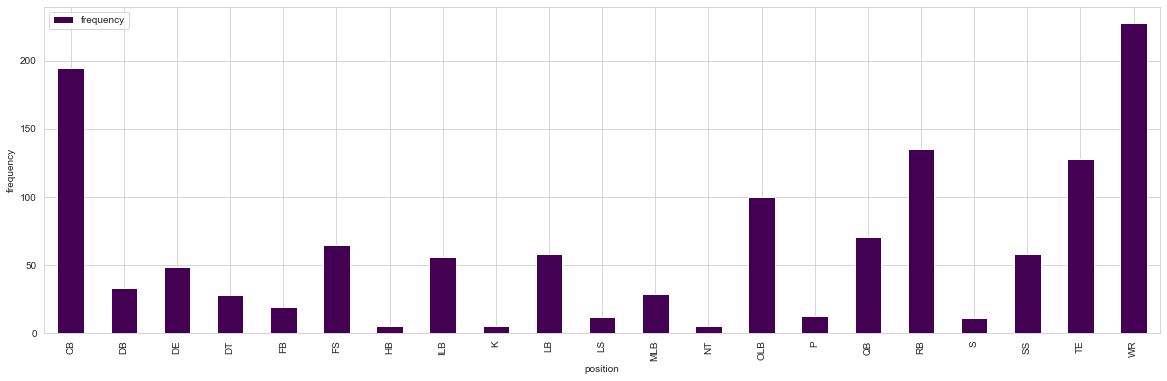

In [44]:
find_dist(df2, 'position') #plot showing the number of players with relation to their playing positions

Text(0, 0.5, 'frequency')

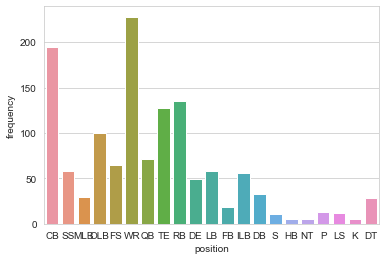

In [45]:
sns.countplot(x = 'position', data = df2)
plt.ylabel('frequency')

Now, let's have a look at the distribution of players for a few particular playing positions.

In [46]:
#Selecting position = CB
df2[df2['position'] == 'CB']

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
28,2552689,71,193,1994-01-02,Florida State,CB,Ronald Darby,1994,24
29,2555383,72,191,1994-04-06,Louisiana State,CB,Jalen Mills,1994,24
...,...,...,...,...,...,...,...,...,...
1228,2561316,70,185,1996-02-02,Utah State,CB,Jalen Davis,1996,22
1241,2556371,72,200,1992-09-09,Texas A&M,CB,Brandon Williams,1992,26
1248,2558858,5-11,195,1994-06-25,Auburn,CB,Joshua Holsey,1994,24
1278,2558819,6-2,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24


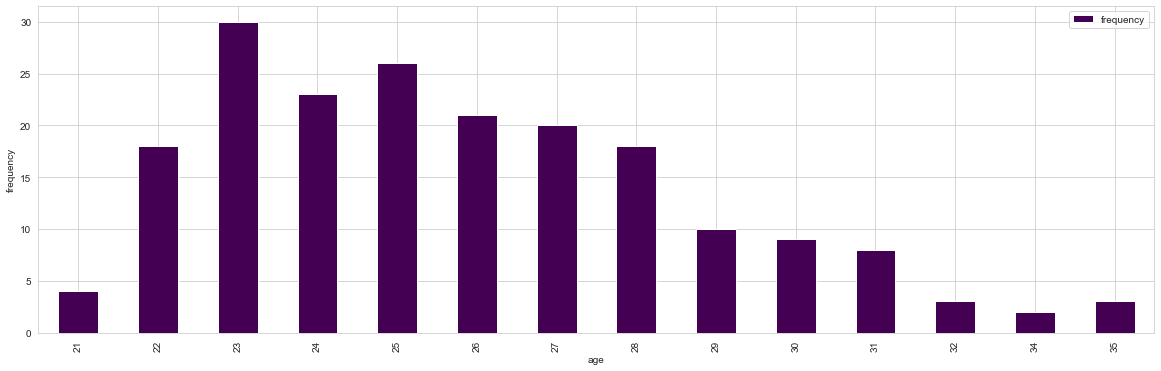

In [47]:
#visualization frequency distribution of the players playing in the CB position
find_dist(df2[df2['position'] == 'CB'], 'age')

In [48]:
#Selecting position = CB
df2[df2['position'] == 'MLB']

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
27,2552315,73,236,1992-06-27,Texas,MLB,Jordan Hicks,1992,26
109,2555166,73,245,1993-11-06,Wisconsin,MLB,Joe Schobert,1993,25
146,2543814,73,255,1992-10-27,Louisville,MLB,Preston Brown,1992,26
183,2558982,72,235,1994-01-05,Illinois,MLB,Hardy Nickerson,1994,24
259,2533057,75,260,1990-03-12,Alabama,MLB,Dont'a Hightower,1990,28
262,2556119,72,238,1994-04-22,Houston,MLB,Elandon Roberts,1994,24
297,2550565,72,230,1990-09-21,Florida Atlantic,MLB,Adarius Taylor,1990,28
298,2552592,73,227,1994-08-03,Louisiana State,MLB,Kwon Alexander,1994,24
316,2539277,73,241,1991-01-26,Notre Dame,MLB,Manti Te'o,1991,27


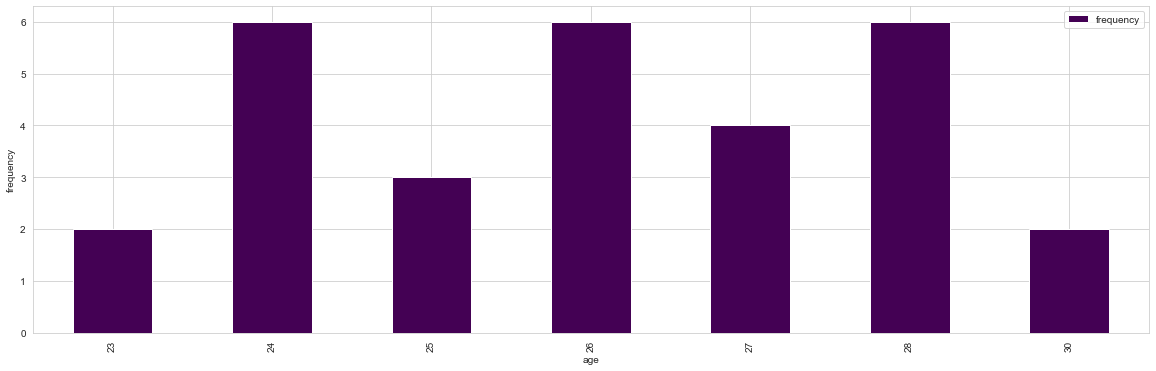

In [49]:
#visualization frequency distribution of the players playing in the MLB position
find_dist(df2[df2['position'] == 'MLB'], 'age')

In [50]:
df2.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


We can see that there's some inconsistency with the data in the height column. We need to clean the data and fix this issue.

In [51]:
# Fixing the inconsistency by converting all data to inches
df2['height'] = df2['height'].apply(lambda x: int(x[0])*12 + int(x[2]) if '-' in x else int(x))

# Looking at the first twenty rows
df2.head(20)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,72,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


Now we look at the hight and weight distribution of the players by creating a jointplot.

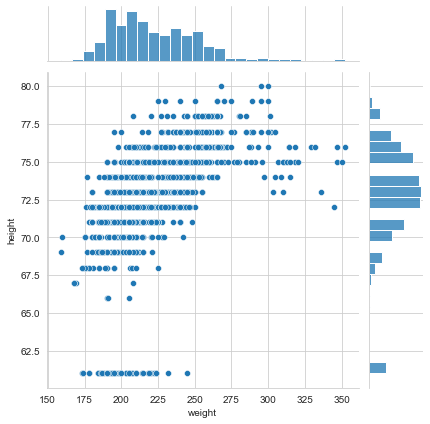

In [52]:
sns.jointplot(x = 'weight', y = 'height', data = df2)

# Play Data 

Now, we will analyse the play data which contains in depth information about the playing data.

In [53]:
df3 = pd.read_csv('data/plays.csv')

In [54]:
df3.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [56]:
df3.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa
count,1.923900e+04,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19177.000000,18606.000000,18600.000000,18600.000000,18600.000000,19239.000000,19239.000000,19239.000000
mean,2.018107e+09,2176.217319,2.591039,1.920318,8.923905,29.860232,6.036189,4.216543,10.758333,12.465484,59.905753,6.279380,6.469047,0.020725
std,1.148060e+04,1240.919041,1.123155,0.848819,3.974216,12.444118,1.015547,0.897862,9.798115,10.552753,23.641588,10.184296,10.566605,1.580748
min,2.018091e+09,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,-19.000000,-78.000000,-11.935951
25%,2.018100e+09,1125.000000,2.000000,1.000000,6.000000,21.500000,6.000000,4.000000,3.000000,3.000000,40.000000,0.000000,0.000000,-0.745327
50%,2.018110e+09,2166.000000,3.000000,2.000000,10.000000,30.000000,6.000000,4.000000,9.000000,10.000000,60.000000,4.000000,4.000000,-0.190540
75%,2.018120e+09,3203.500000,4.000000,3.000000,10.000000,40.000000,7.000000,5.000000,17.000000,20.000000,80.000000,10.000000,11.000000,0.976822
max,2.018123e+09,5661.000000,5.000000,4.000000,41.000000,50.000000,11.000000,10.000000,51.000000,54.000000,109.000000,97.000000,97.000000,8.629316


In [57]:
df3.shape

(19239, 27)

In [58]:
# Writing a function to get the plots for the frequency of palyers per any criteria like-date, time etc.

def find_dist(df, col_name):
    #Frequency of players per column value
    dist = df[col_name].value_counts().reset_index()
    
    #Renaming the columns
    dist.columns = [col_name, 'frequency']
    
    #sorting the dataframe based on column values
    sorted_dist = dist.sort_values(col_name).set_index(col_name)
    
    #plotting the frequency distribution
    
    sorted_dist.plot(kind = 'bar', figsize=(20,6), cmap = 'rainbow')
    plt.ylabel('frequency')
    
    #Return to complete and execute the function
    
    return 


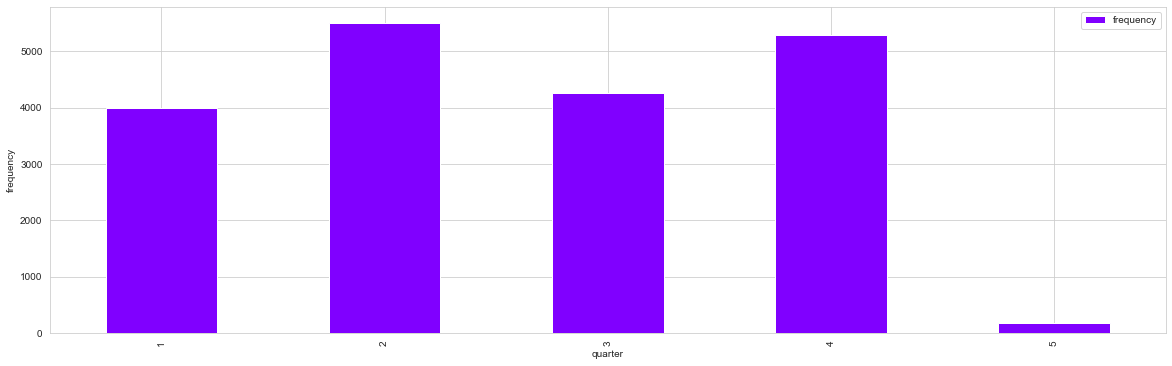

In [59]:
find_dist(df3, 'quarter') #number of plays for every quarter

Text(0, 0.5, 'frequency')

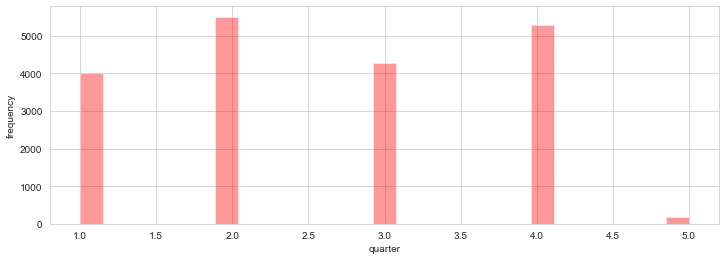

In [71]:
plt.figure(figsize=(12,4))
sns.distplot(df3['quarter'], kde= False, color = 'red' )
plt.ylabel('frequency')

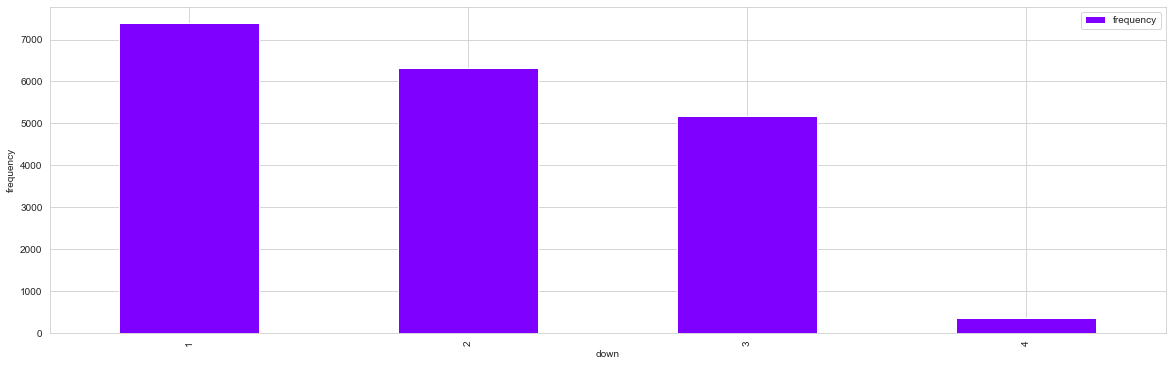

In [60]:
find_dist(df3, 'down') #number of plays for every down

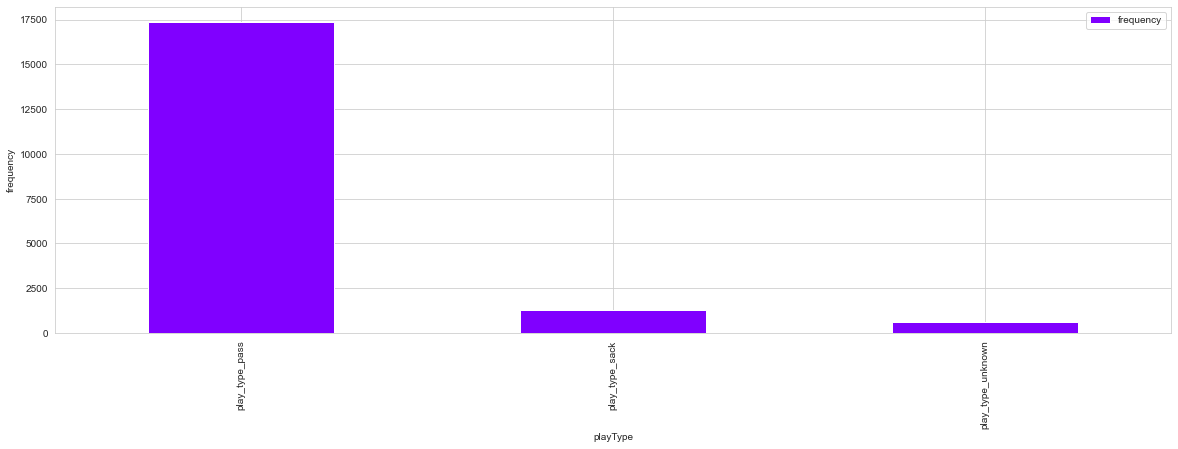

In [61]:
find_dist(df3, 'playType') #number of plays for every play type

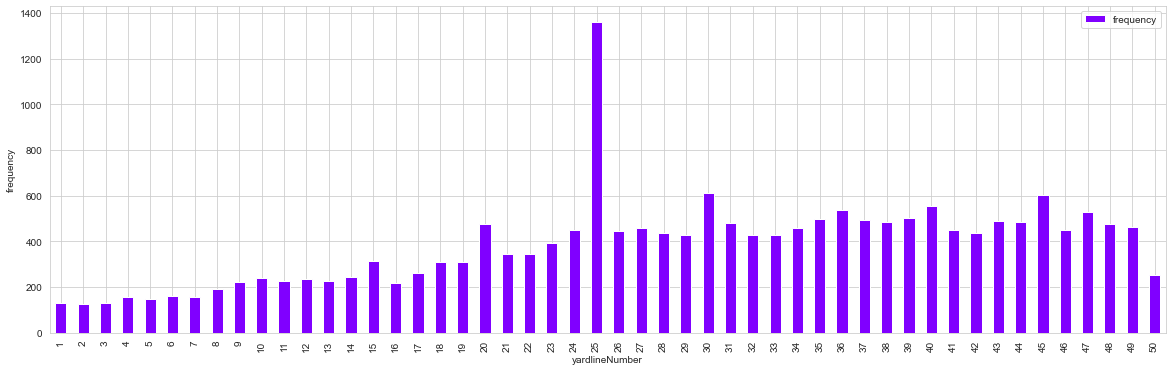

In [62]:
find_dist(df3, 'yardlineNumber') #number of plays for every yardline

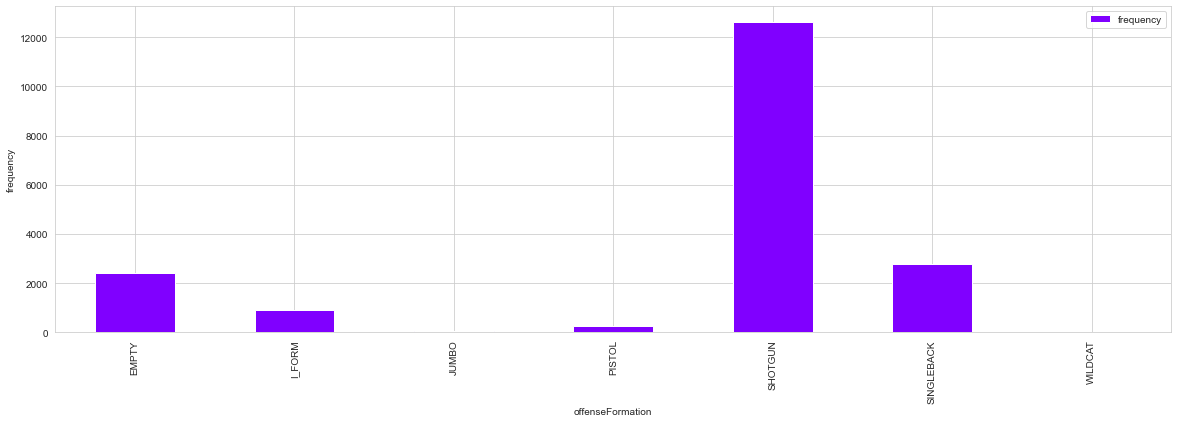

In [63]:
find_dist(df3, 'offenseFormation')     #number of plays for every offense formation type

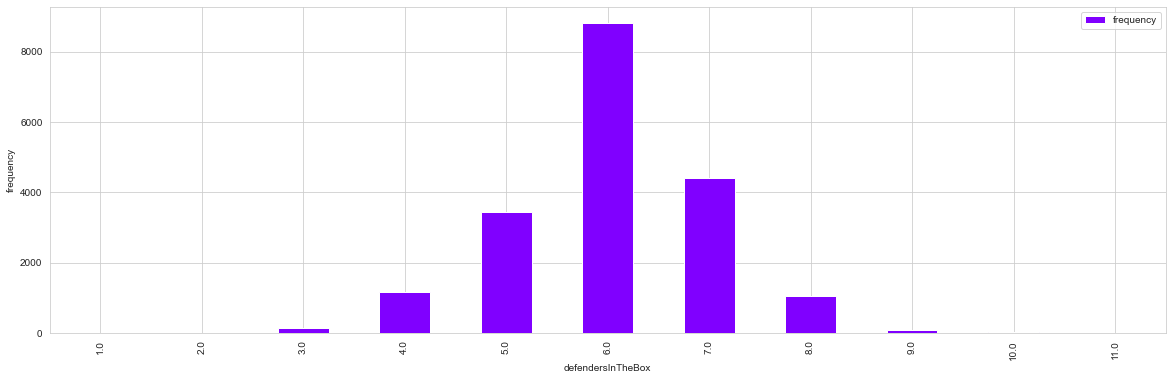

In [64]:
find_dist(df3, 'defendersInTheBox')  #number of plays for every defender in the box

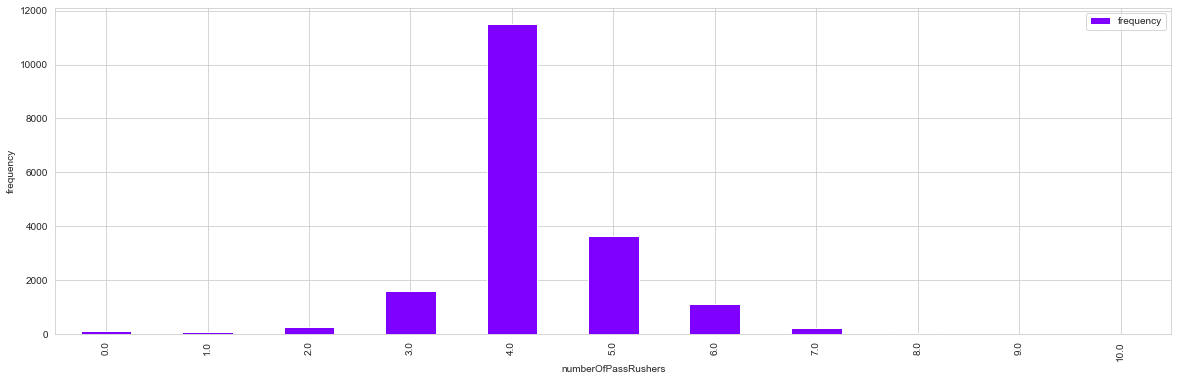

In [65]:
find_dist(df3, 'numberOfPassRushers') #number of plays for every number of pass rushers

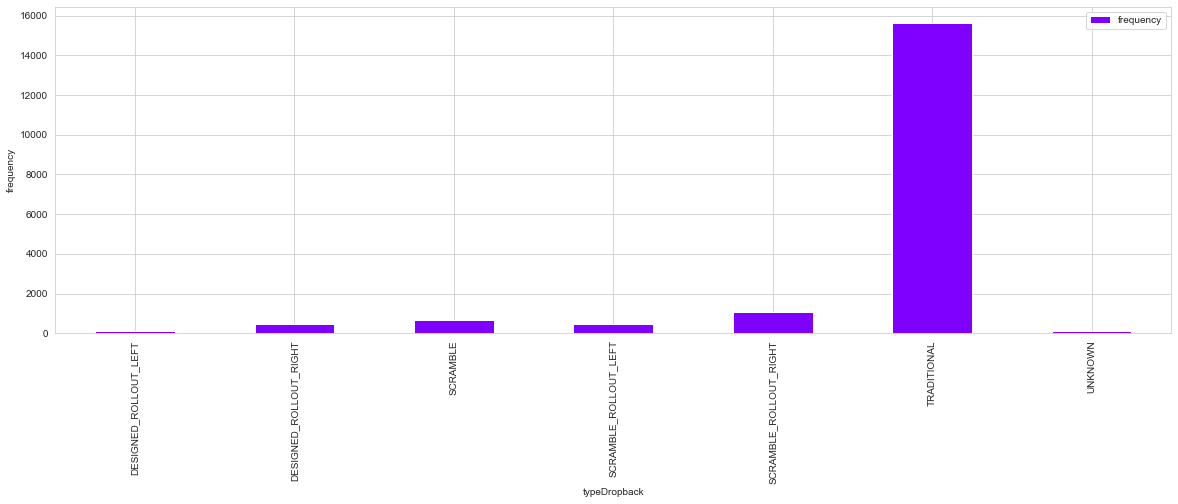

In [66]:
find_dist(df3, 'typeDropback')  #number of plays for every number 

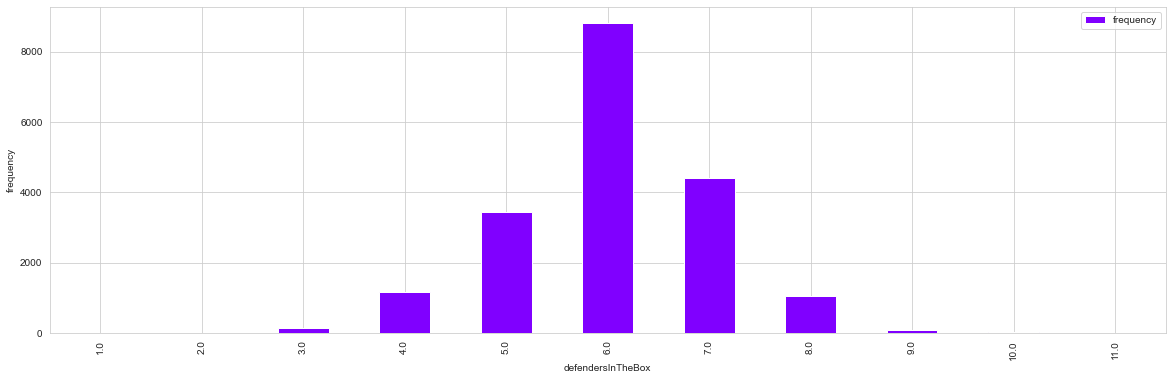

In [80]:
find_dist(df3, 'defendersInTheBox') #number of plays for every defenders in the box